In [99]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# HW2-Problem 1

$$\Gamma(a)=\int_0^{\infty}x^{a-1}e^{-x}dx$$

a) Write a program to make a graph of the value of the integral given from x=0-5 for a = 2. On
the same axis plot the result for ours five integration methods (Trapezoid, Gaussian Quadrature,
Aimpson’s, Romberg and Monte Carlo. On two other sets of axis show the value as a function of
N=8,16,32,63,128,256 for each method and plot the estimated error as a function of N.

In [100]:
def f(x,a):
    '''Function inside the integral of gamma function'''
    return (x**(a-1))/np.exp(x)
f=np.vectorize(f)

In [101]:
#Monte carlo Integration
def montecarlo(N,a):
    '''Calculates the Gamma function using
    the monte carlo integration method'''
    a1=0.0
    b1=5.0
    #generate N number of x values
    x=np.random.random(N)*(b1-a1)+a1

    #maximum value of the function
    max=np.amax(f(x,a))
    min=np.amin(f(x,a))
    #Generate N number of y values
    y=np.random.random(N)*(max-min)+min
    
    #count
    count=len(f(x,a)[y<f(x,a)])

    #Area
    A=(b1-a1)*(max-min)

    #Integral
    I=count*A/N
    return I

montecarlo=np.vectorize(montecarlo)

In [102]:
#Gamma function
def gamma(N1,I):
    '''Returns the Gamma function at a=2:
    Integral of x^(a-1)*e^(-x) from 0 to 5
    for N points'''
    N=N1+1
    x=np.linspace(0,5,N)
    
    if(I=='Trapezoid'):
        Integral=integrate.trapz(f(x,2),x,N)
        
    elif(I=='Gaussian Quadrature'):
        #calculate the value +error using Gaussian Quadrature
        Integral,error=integrate.quadrature(f,0,5,args=2,maxiter=2*N-1)
    elif(I=='Simpsons'):
        #calculate the integral using simpson's rule
        Integral=integrate.simps(f(x,2),x,dx=5.0/N)
    elif(I=='Romberg'):
        #calculate the integral using romberg method
        Integral=integrate.romb(f(x,2),dx=5.0/N)
    else:
        #Calculate the integral using monte carlo method
        Integral=montecarlo(N,2)
        
    #Calculate the error=|actual value-calculated value|
    error=np.abs(1.0-Integral)
    return Integral,error
gamma=np.vectorize(gamma)

In [103]:
#Integration methods
T='Trapezoid'
G='Gaussian Quadrature'
S='Simpsons'
R='Romberg'
M='MonteCarlo'

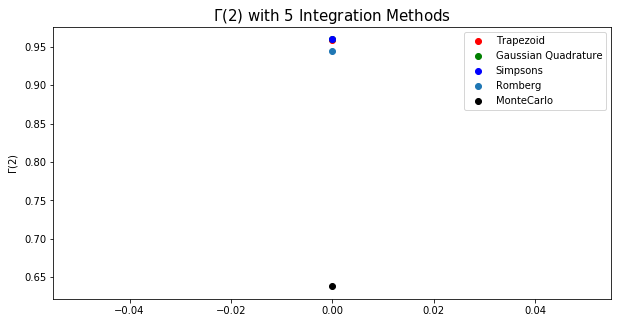

In [115]:
#Gamma function with x=0 to 5 
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.set_title('$\Gamma(2)$ with 5 Integration Methods',size=15)
N1=64

ax.plot(0,gamma(N1,T)[0],'ro',0,gamma(N1,G)[0],'go',0,gamma(N1,S)[0],'bo',0,gamma(N1,R)[0],'o',0,gamma(N1,M)[0],'ko')
ax.legend([T,G,S,R,M])
ax.set_ylabel('$\Gamma(2)$')
plt.show()
fig.savefig('Gamma(2).pdf')

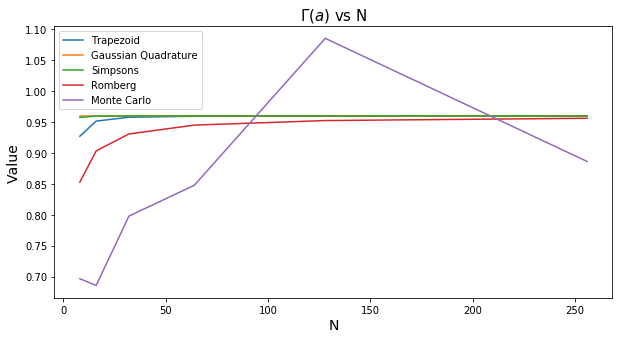

In [116]:
#Array for number of points
N=[8,16,32,64,128,256]

#Plot the results
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
labels=['Trapezoid','Gaussian Quadrature','Simpsons','Romberg','Monte Carlo']
ax1.plot(N,gamma(N,T)[0],N,gamma(N,G)[0],N,gamma(N,S)[0],N,gamma(N,R)[0],N,gamma(N,M)[0])
ax1.set_xlabel('N',size=14)
ax1.set_ylabel('Value',size=14)
ax1.set_title('$\Gamma(a)$ vs N',size=15)
ax1.legend(labels)
fig.savefig('Gamma.pdf')

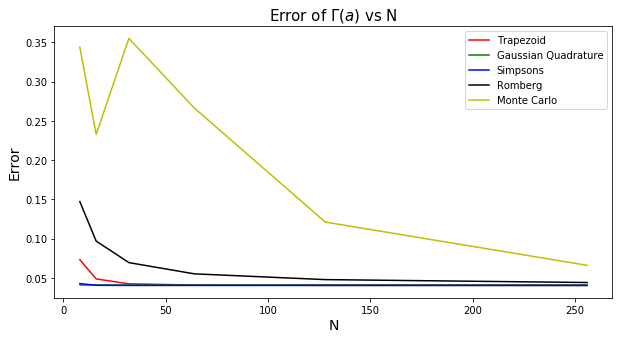

In [117]:
fig=plt.figure(figsize=(10,5))
ax2=fig.add_subplot(111)
labels=['Trapezoid','Gaussian Quadrature','Simpsons','Romberg','Monte Carlo']
ax2.plot(N,gamma(N,T)[1],'r',N,gamma(N,G)[1],'g',N,gamma(N,S)[1],'b',N,gamma(N,R)[1],'k',N,gamma(N,M)[1],'y')
ax2.set_xlabel('N',size=14)
ax2.set_ylabel('Error',size=14)
ax2.set_title('Error of $\Gamma(a)$ vs N',size=15)
ax2.legend(labels)
fig.savefig('error.pdf')

b) Choose what you think is the best integrator for this method and the N required for accuracy.
Justify your choices and write a program to make a graph of the value of the integral given from
x=0-5 for a = 2,3, and 4 on the same axis.<br><br>

I think Gaussian Quadrature is the best integrater out of all. Because the error is always minimized compared to<br>
other integraters. Higher value of N increases the accuracy. So I choose $N=2^8$ 

In [128]:
aval=[2,3,4]
def Gamma(N,a):
    '''Calculates the value of Gamma function with
    with N spaces'''
    N1=N+1
    x=np.linspace(0,5,N1)
    
    return integrate.quadrature(f,0,5,args=a,maxiter=2*N1-1)[0]

Gamma=np.vectorize(Gamma)

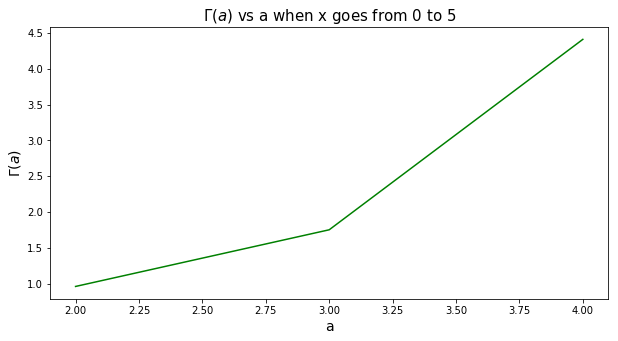

In [129]:
#Plot Gamma as a function of a
fig=plt.figure(figsize=(10,5))
ax3=fig.add_subplot(111)
ax3.plot(aval,Gamma(2**8,aval),'g-') 
ax3.set_xlabel('a',size=14)
ax3.set_ylabel('$\Gamma(a)$',size=14)
ax3.set_title('$\Gamma(a)$ vs a when x goes from 0 to 5',size=15)
fig.savefig('Gamma_v_a.pdf')

c) In order to numerically integrate $x = 0 \rightarrow \infty$ we need to change variables. Since most of value of
the integral is near the peak, what is the change of variables which shifts the range of integration
from 0 to 1 and places the peak near 1/2.<br>

Note that our integral is $$\int_0^{\infty} x^{a-1}e^{-x} dx$$
Let $y=e^{-x}$, then when $x=0, y=1$ and when $x=\infty$, $y=0$. 
Moreover, $dy=-e^{-x}dx$ and $lny=-x$
So the integral becomes
$$\int_0^{1} (-lny)^{a-1} dy$$

d) We next need to transform the integral to make it a bit easier to evaluate. This can be done by
writing $x^{a−1}$ as $e^{(a−1)lnx}$. Using this new transformation calculate to write a user defined function
Γ(a) which will calculate Γ for an arbitrary a value. Test your function with the known value of
$Γ(1.5) = 0.5\sqrt(\pi)$.

In [142]:
def sub_func(x,a):
    '''Function inside gamma function'''
    exponent=(a-1)*np.log(-np.log(x))
    return np.exp(exponent)

sub_func=np.vectorize(sub_func)

def Gamma_function(a):
    '''Returns the value of gamma function:
    Process: calculates the integral of exp((a-1)ln(-lnx))
    from 0 to 1'''
    
    #Integral
    N1=257
    I=integrate.quadrature(sub_func,0,1,args=a,maxiter=2*N1-1)[0]
    return I

Gamma_function=np.vectorize(Gamma_function)


In [143]:
real_val=0.5*np.sqrt(np.pi)
print('Gamma(1.5) is {} and the calculated value is {}'.format(real_val,Gamma_function(1.5)))


Gamma(1.5) is 0.8862269254527579 and the calculated value is 0.8862252905185762


So the values are almost the same

e) Plot the Gamma function for a = 1-10.

In [144]:
#Create an array from 1-10
a=np.arange(1,11,1)
Ga=Gamma_function(a)

C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 2.506839e-07
  AccuracyWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 4.999337e-06
  AccuracyWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 8.799922e-05
  AccuracyWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 1.442971e-03
  AccuracyWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 2.258467e-02
  AccuracyWarning)
C:\Users\Sachi\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (513) exceeded. Latest difference = 3.4187

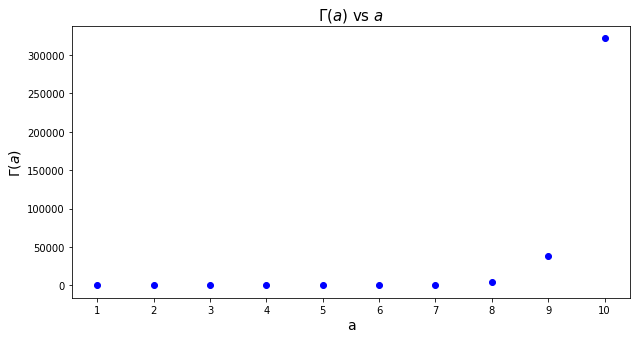

In [145]:
#Plot the gamma function 
fig=plt.figure(figsize=(10,5))
ax4=fig.add_subplot(111)
ax4.set_title('$\Gamma(a)$ vs $a$',size=15)
ax4.set_xlabel('a',size=14)
ax4.set_ylabel('$\Gamma(a)$',size=14)
ax4.set_xticks(np.arange(1,11,1))
ax4.plot(a,Ga,'bo')
fig.savefig('Gamma_v_a_2.pdf')

f) Show that for integer values of a the Gamma function is equal to the factorial of a. (HINT: Write
a user defined function to calculate the factorial of an integer).

Ithink this should be  $\Gamma(a)=(a-1)!$????

In [146]:
#Function for n!
def factorial(n):
    '''Calculates the factorial,
    i.e. f(n)=n*(n-1)*(n-2)*...*2*1'''
    fac=1
    for i in range(1,n+1):
        fac=fac*i
        
    return fac

factorial=np.vectorize(factorial)

In [147]:
print('%13s'%'Γ(a)','|','%13s'%'Factorial(a-1)')
print('------------------------------------')
for i in a:
    print('%13s'%np.int(np.round(Ga[i-1],decimals=1)),'|','%13s'%factorial(i-1))


         Γ(a) | Factorial(a-1)
------------------------------------
            1 |             1
            1 |             1
            2 |             2
            6 |             6
           24 |            24
          119 |           120
          711 |           720
         4890 |          5040
        37830 |         40320
       321764 |        362880
